In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
df = df.dropna(axis='columns')

In [5]:
print(df.shape)
df.isnull().sum()

(1460, 62)


Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

In [6]:
target_column = 'SalePrice'

X = df.drop(columns=[target_column])
y = df[target_column]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = pd.concat([x_train, y_train], axis=1)

In [7]:

train_data.corr(numeric_only=True)[target_column].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.785555
GrLivArea        0.695652
GarageCars       0.640991
GarageArea       0.624139
TotalBsmtSF      0.597766
1stFlrSF         0.587883
FullBath         0.552546
TotRmsAbvGrd     0.520388
YearBuilt        0.516501
YearRemodAdd     0.508593
Fireplaces       0.457549
BsmtFinSF1       0.359460
WoodDeckSF       0.329843
2ndFlrSF         0.314030
OpenPorchSF      0.299969
HalfBath         0.280481
LotArea          0.266204
BsmtFullBath     0.226346
BsmtUnfSF        0.222487
BedroomAbvGr     0.156211
ScreenPorch      0.119172
PoolArea         0.115630
3SsnPorch        0.051532
MoSold           0.041890
BsmtFinSF2      -0.005731
YrSold          -0.009099
LowQualFinSF    -0.011189
Id              -0.019643
MiscVal         -0.020179
BsmtHalfBath    -0.048346
OverallCond     -0.074391
MSSubClass      -0.088081
KitchenAbvGr    -0.142785
EnclosedPorch   -0.149532
Name: SalePrice, dtype: float64

In [8]:
train_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,730.904966,56.849315,10689.642123,6.121575,5.584760,1970.965753,1984.897260,446.023973,45.152397,570.595034,...,95.946918,49.578767,21.839041,3.812500,15.407534,2.955479,51.267123,6.356164,2007.818493,181441.541952
std,425.369088,42.531862,10759.366198,1.367619,1.116062,30.675495,20.733955,459.070977,158.217499,446.364551,...,129.685939,69.433580,62.083227,31.519664,55.881148,41.648504,553.039684,2.670707,1.322639,77263.583862
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.750000,20.000000,7587.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,222.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,732.500000,50.000000,9600.000000,6.000000,5.000000,1972.000000,1994.000000,384.500000,0.000000,480.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,1101.750000,70.000000,11700.000000,7.000000,6.000000,2001.000000,2004.000000,721.000000,0.000000,810.250000,...,168.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214925.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1127.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,745000.000000


In [9]:
features = ['GarageArea', 'GrLivArea']
# filter chosen features
x_train = x_train[features]
x_test = x_test[features]

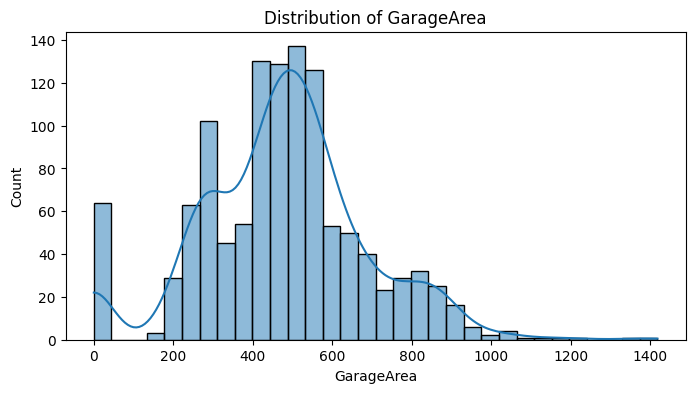

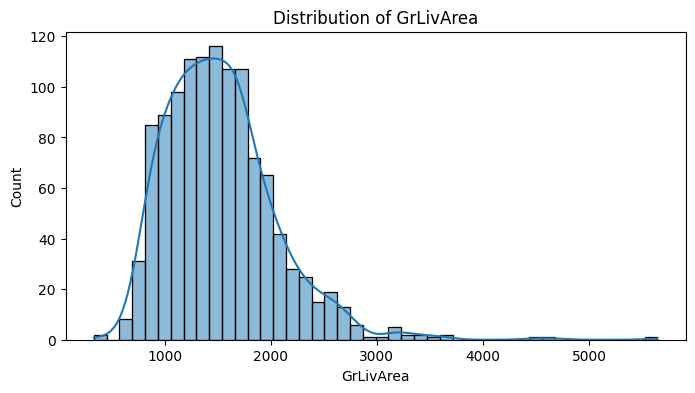

In [10]:
for f in features:
    plt.figure(figsize=(8,4))  # Create a new figure for each plot
    sns.histplot(data=train_data, x=f, kde=True)  # Plot histogram with KDE
    plt.title(f'Distribution of {f}')  # Add a title
plt.show()

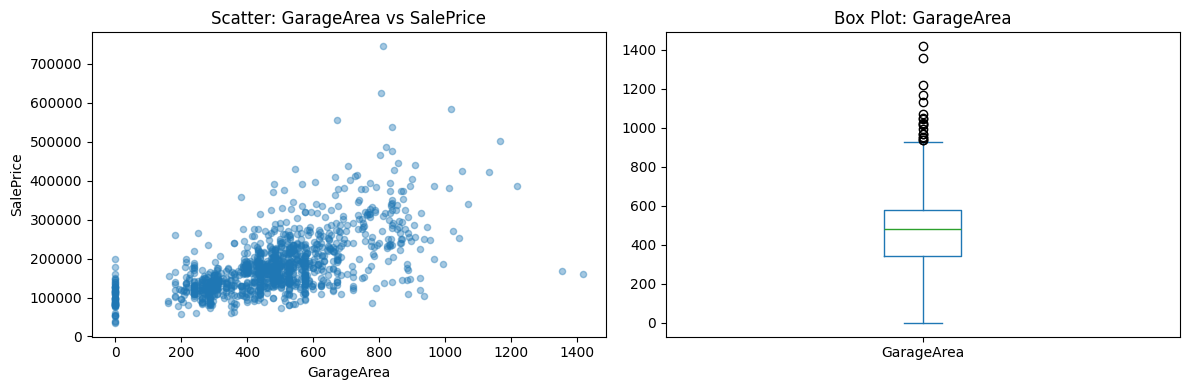

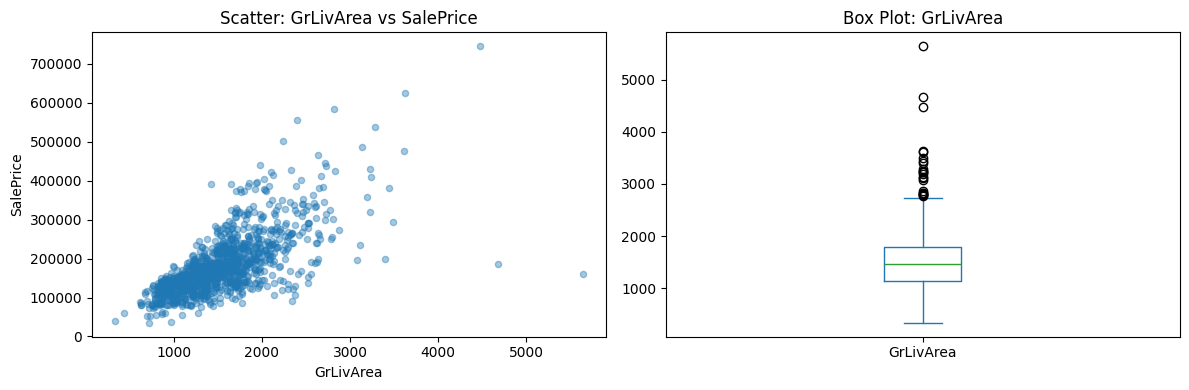

In [11]:
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create a side-by-side layout

    # Scatter plot: Feature vs Target
    train_data.plot(kind='scatter', x=feature, y=target_column, alpha=0.4, ax=axes[0])
    axes[0].set_title(f'Scatter: {feature} vs {target_column}')

    # Box plot: Distribution of Feature
    train_data[feature].plot(kind='box', ax=axes[1])
    axes[1].set_title(f'Box Plot: {feature}')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

In [12]:
def remove_outliers(df, columns):
    """
    Remove outliers using the IQR method for specified columns.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile Range

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

print(train_data.shape)
train_data_clean = remove_outliers(train_data, features)
print(train_data_clean.shape)

(1168, 62)
(1131, 62)


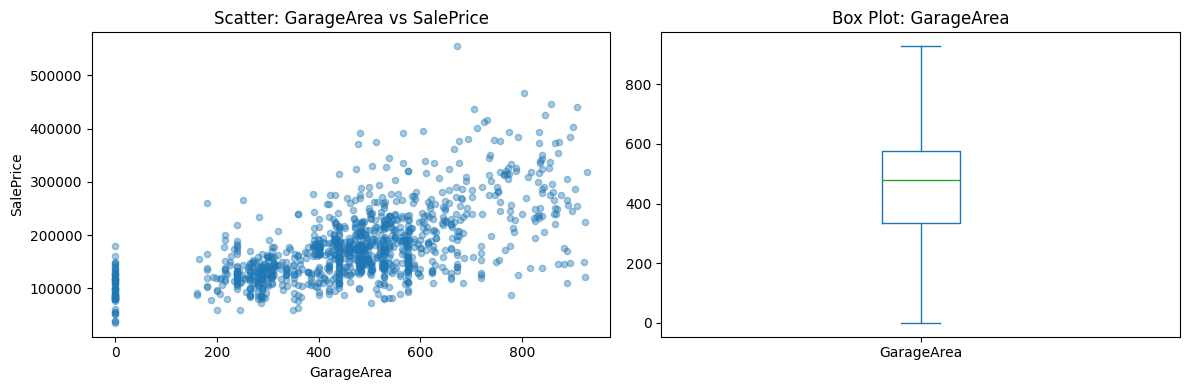

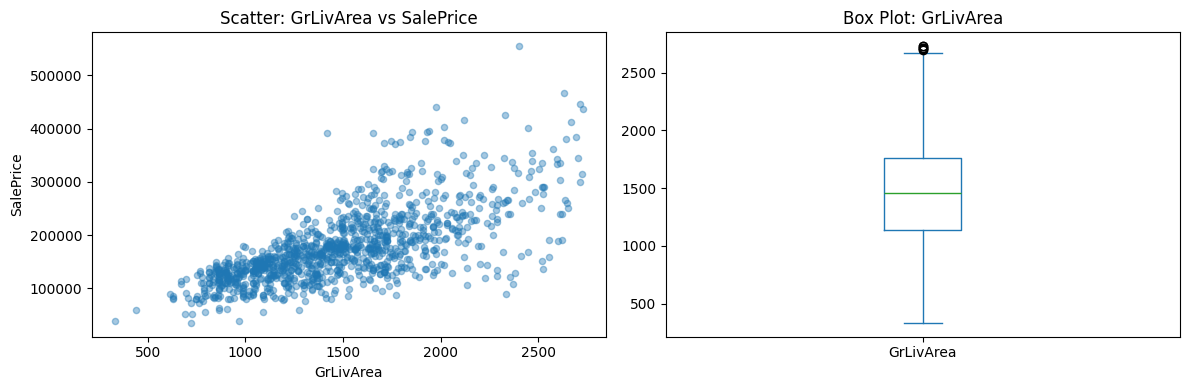

In [13]:
# showing plots after removed outliers
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create a side-by-side layout

    # Scatter plot: Feature vs Target
    train_data_clean.plot(kind='scatter', x=feature, y=target_column, alpha=0.4, ax=axes[0])
    axes[0].set_title(f'Scatter: {feature} vs {target_column}')

    # Box plot: Distribution of Feature
    train_data_clean[feature].plot(kind='box', ax=axes[1])
    axes[1].set_title(f'Box Plot: {feature}')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

In [14]:
# setting x_train and y_train
x_train = train_data_clean[features]
y_train = train_data_clean['SalePrice']
print(x_train.shape)
print(y_train.shape)

(1131, 2)
(1131,)


In [15]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

Peak to Peak range by column in Raw        X:GarageArea     928
GrLivArea     2394
dtype: int64
Peak to Peak range by column in Normalized X:[4.72891408 5.36930197]


In [16]:
model = SGDRegressor(max_iter=1000)
model.fit(x_norm, y_train)
print(model)
print(f"number of iterations completed: {model.n_iter_}, number of weight updates: {model.t_}")

SGDRegressor()
number of iterations completed: 9, number of weight updates: 10180.0


In [17]:
def plot_target_vs_prediction(x_train, y_train, y_pred, feature_names):
    """
    Plots target vs. predicted values for each feature.

    Parameters:
    - x_train: DataFrame of training features
    - y_train: Series or array of actual target values
    - y_pred: Array of predicted target values
    - feature_names: List of feature names
    """
    num_features = len(feature_names)  # Number of features to plot

    # Create a subplot with one row and multiple columns (one per feature)
    fig, axes = plt.subplots(1, num_features, sharey=True, figsize=(10, 5))

    # Ensure axes is always iterable (even if there's one feature)
    if num_features == 1:
        axes = [axes]

    # Plot each feature
    for i, feature in enumerate(feature_names):
        axes[i].scatter(x_train.iloc[:, i].values, y_train.values, label='Target', alpha=0.5)
        axes[i].scatter(x_train.iloc[:, i].values, y_pred, label='Prediction', alpha=0.5)
        axes[i].set_xlabel(feature)

    # Set labels and title
    axes[0].set_ylabel("Price")
    axes[0].legend()
    fig.suptitle("Target vs Prediction using Z-score Normalized Model")

    # Display the plot
    plt.show()

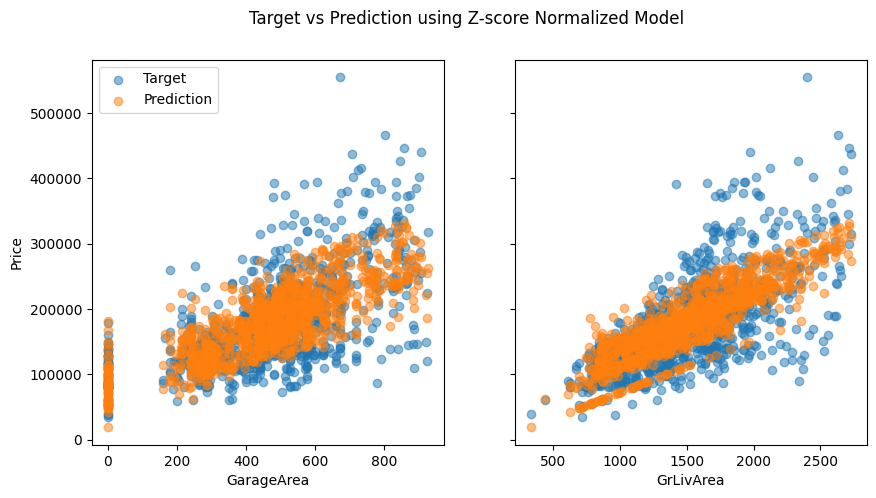

In [18]:
y_pred = model.predict(x_norm)
plot_target_vs_prediction(x_train, y_train, y_pred, features)

## Now lets test the model with the test data

In [19]:
x_norm = scaler.fit_transform(x_test)
y_test_pred = model.predict(x_norm)

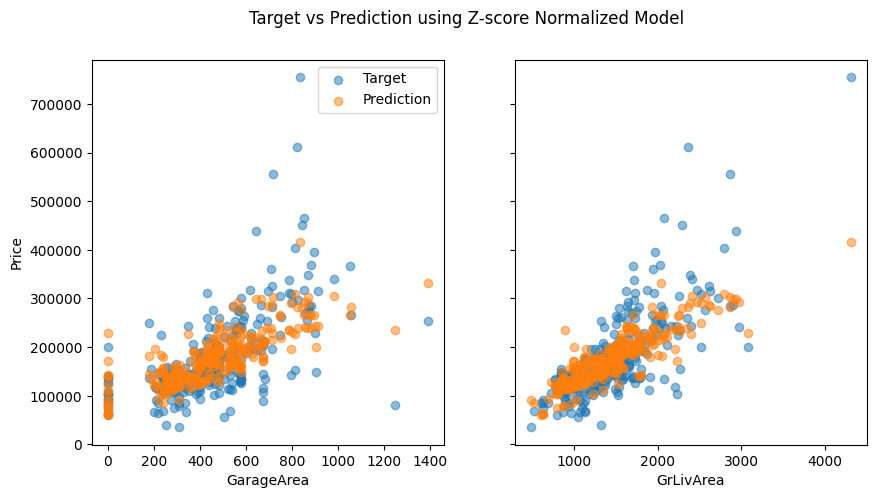

In [20]:
plot_target_vs_prediction(x_test, y_test, y_test_pred, features)

In [21]:
result = mean_absolute_error(y_test, y_test_pred)
result

32891.74592794076